In [1]:
# importing csv module
import csv
import json
from datetime import date
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getDifference(a, b):
    m , y = [int(x) for x in a.strip().split('/')]
    m2,y2 = [int(x) for x in b.strip().split('/')]
    return ((y2 * 12) + m2) - ((y * 12) + m)


In [3]:
# csv file name
filename = "acw_user_data.csv"
 
# initializing the titles and rows list
fields = []
rows = []
 
# reading csv file
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
     
    # extracting field names through first row
    fields = next(csvreader)
 
    # extracting each data row one by one
    for row in csvreader:
        rows.append(row)

In [4]:
data = []
for row in rows:
    record = {}

    record['first_name'] = row[fields.index('First Name')]
    record['second_name'] = row[fields.index('Last Name')]
    record['age'] = int(row[fields.index('Age (Years)')])
    record['sex'] = row[fields.index('Sex')]
    record['retired'] = row[fields.index('Retired')]
    record['marital_status'] = row[fields.index('Marital Status')]
    if row[fields.index('Dependants')].strip() == "":
        record['dependents'] = 0
    else:
        record['dependents'] = int(row[fields.index('Dependants')])
    record['salary'] = int(row[fields.index('Yearly Salary (GBP)')])
    record['pension'] = int(row[fields.index('Yearly Pension (GBP)')])
    record['company'] = row[fields.index('Employer Company')]
    record['commute_distance'] = float(row[fields.index('Distance Commuted to Work (Km)')])
    record['vehicle'] = {}
    record['vehicle']['make'] = row[fields.index('Vehicle Make')]
    record['vehicle']['model'] = row[fields.index('Vehicle Model')]
    record['vehicle']['year'] = int(row[fields.index('Vehicle Year')])
    record['vehicle']['category'] = row[fields.index('Vehicle Type')]
    record['Credit Card'] = {}
    record['Credit Card']['start_date'] = row[fields.index('Credit Card Start Date')]
    record['Credit Card']['end_date'] = row[fields.index('Credit Card Expiry Date')]
    record['Credit Card']['number'] = row[fields.index('Credit Card Number')]
    record['Credit Card']['ccv'] = row[fields.index('Credit Card CVV')]
    record['Credit Card']['iban'] = row[fields.index('Bank IBAN')]
    record['Address'] = {}
    record['Address']['street'] = row[fields.index('Address Street')]
    record['Address']['city'] = row[fields.index('Address City')]
    record['Address']['postcode'] = row[fields.index('Address Postcode')]
    data.append(record)



In [5]:
out_file = open("processed.json", "w") 
json.dump(data, out_file, indent = 6) 
out_file.close() 


In [6]:

data_retired = [x for x in data if x['retired'].lower() == 'true'] 
out_file = open("retired.json", "w") 
json.dump(data_retired, out_file, indent = 6) 
out_file.close() 


In [7]:

data_emp = [x for x in data if x['retired'].lower() == 'false'] 
out_file = open("employed.json", "w") 
json.dump(data_emp, out_file, indent = 6) 
out_file.close() 


In [8]:

data_ccard = [x for x in data if getDifference(x['Credit Card']['start_date'] , x['Credit Card']['end_date']) <= 10] 
out_file = open("remove_ccard.json", "w") 
json.dump(data_ccard, out_file, indent = 6) 
out_file.close() 


In [9]:

f = open('processed.json')
data_proc = json.load(f)
for data in data_proc:
    if data['commute_distance'] <= 1:
        data['Salary-Commute'] = data['salary']
    else:
        data['Salary-Commute'] = data['salary'] / data['commute_distance']
for j in range(len(data_proc)-1):
    for i in range(len(data_proc)-1-j):
        if data_proc[i]['Salary-Commute'] > data_proc[i+1]['Salary-Commute']:
            data_proc[i],data_proc[i+1] = data_proc[i+1],data_proc[i]
out_file = open("commute.json", "w") 
json.dump(data_proc, out_file, indent = 6) 
out_file.close() 


Mean Salary:  57814.078
Median Age:  54.0


<Axes: xlabel='Age (Years)', ylabel='Count'>

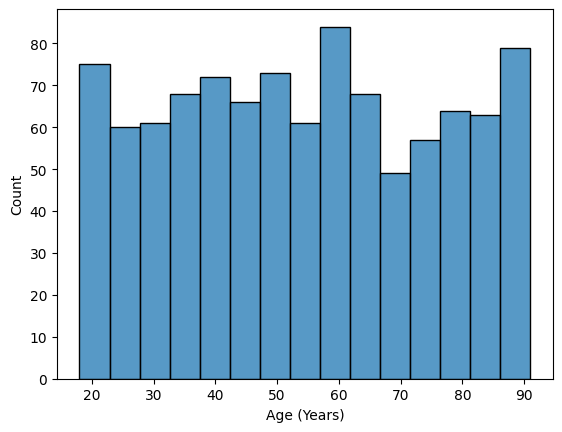

In [12]:



df = pd.read_csv('acw_user_data.csv')
salary = df['Yearly Salary (GBP)']
age = df['Age (Years)']
print('Mean Salary: ',salary.mean())
print('Median Age: ',age.median())


# Calculate the range of ages
age_range = df['Age (Years)'].max() - df['Age (Years)'].min()

# Calculate number of bins for a bin width of 5
bin_width = 5
num_bins_age = int(np.ceil(age_range / bin_width))

# Plot Age
sns.histplot(data=df, x='Age (Years)', bins=num_bins_age)




[ 3.  1.  2.  4. nan  5.]


<Axes: xlabel='Dependants', ylabel='count'>

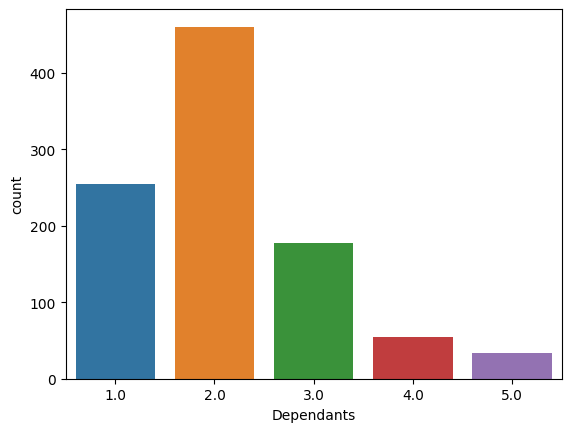

In [13]:
# Check unique values in 'Dependants' to identify errors
print(df['Dependants'].unique())

# Plot Dependents to visualize data errors
sns.countplot(data=df, x='Dependants')



In [ ]:
# Plot Age conditioned on Marital Status
sns.histplot(data=df, x='Age (Years)', hue='Marital Status')

<Axes: xlabel='Distance Commuted to Work (Km)', ylabel='Yearly Salary (GBP)'>

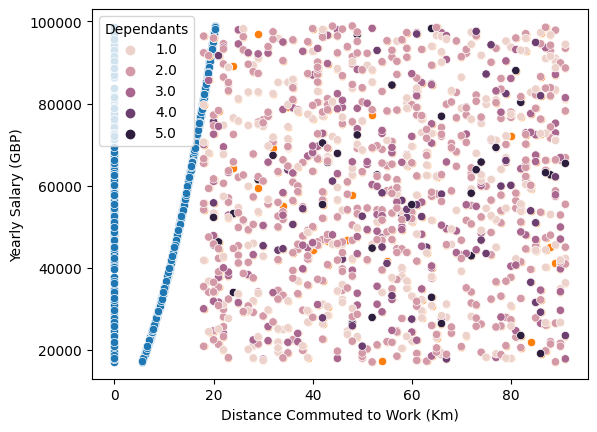

In [11]:
# Plot Commuted Distance against Salary
sns.scatterplot(data=df, x='Distance Commuted to Work (Km)', y='Yearly Salary (GBP)')
# Plot Age against Salary
sns.scatterplot(data=df, x='Age (Years)', y='Yearly Salary (GBP)')
# Plot Age against Salary conditioned by Dependents
sns.scatterplot(data=df, x='Age (Years)', y='Yearly Salary (GBP)', hue='Dependants')
